In [46]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [47]:
# Load the image with PIL
image = Image.open("red-dye/dye8.png")

# Convert to grayscale
gray = image.convert("L")  # "L" mode = grayscale

# Convert to numpy arrays
image_rgb = np.array(image)
gray_np = np.array(gray)

# Crop the region of interest (center 10x10)
crop_size = 10
h, w = gray_np.shape
cx, cy = w // 2, h // 2
half = crop_size // 2
matrix = gray_np[cy - half:cy + half, cx - half:cx + half]

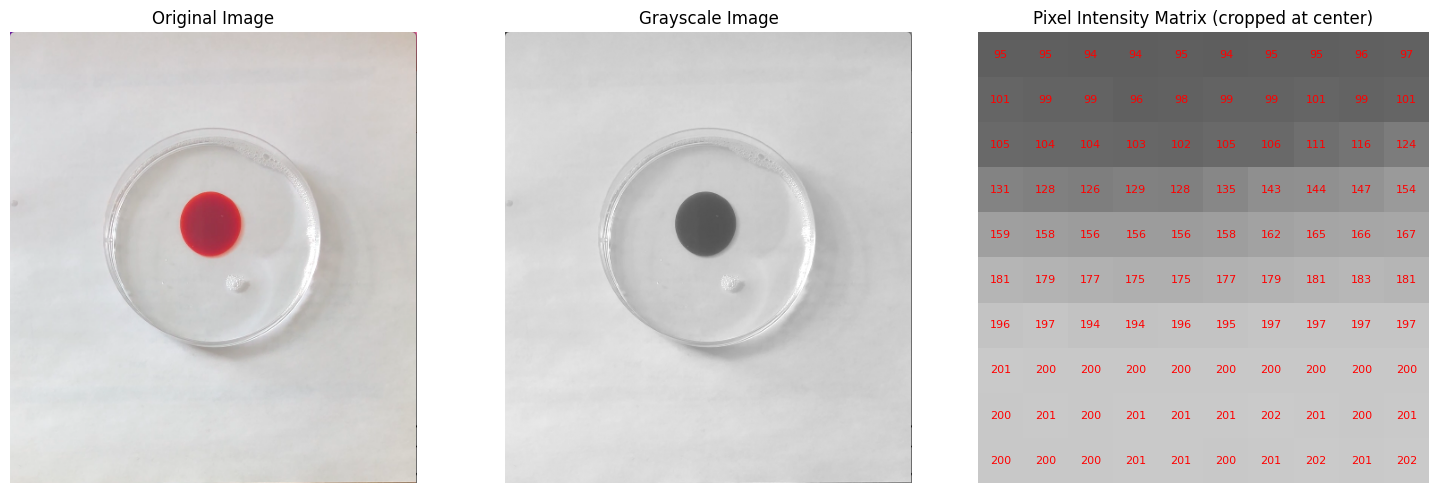

In [48]:
# Plot original image, grayscale, and pixel matrix
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(gray_np, cmap='gray')
axs[1].set_title("Grayscale Image")
axs[1].axis('off')

# Show matrix values over grayscale heatmap
axs[2].imshow(matrix, cmap='gray', vmin=0, vmax=255)
for (i, j), val in np.ndenumerate(matrix):
    axs[2].text(j, i, f'{val}', ha='center', va='center', color='red', fontsize=8)
axs[2].set_title("Pixel Intensity Matrix (cropped at center)")
axs[2].axis('off')

plt.tight_layout()
plt.show()

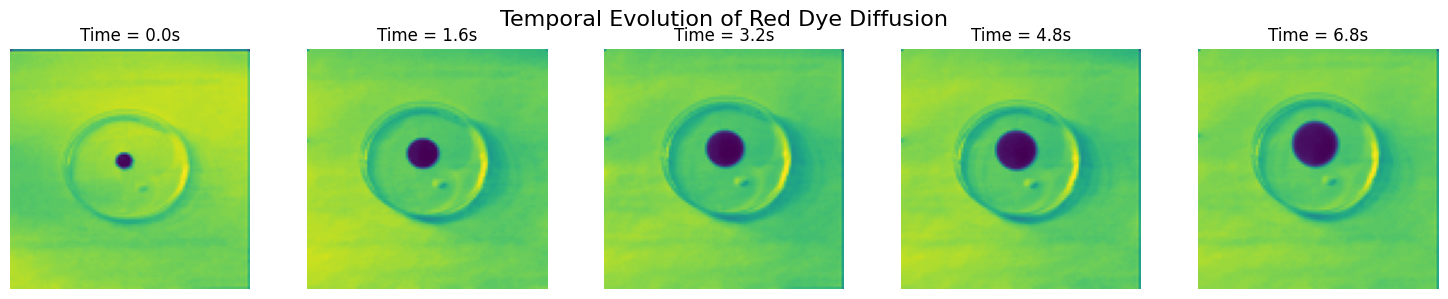

In [49]:
# Parameters
folder_path = "red-dye"
num_images = 18
image_shape = (100, 100)  # Resize all images to the same shape
time_step = 0.4  # seconds between images

# Load and preprocess images
u = np.zeros((num_images, *image_shape))
for i in range(num_images):
    img_path = os.path.join(folder_path, f"dye{i+1}.png")
    img = Image.open(img_path).convert("L")  # Convert to grayscale
    img_resized = img.resize(image_shape)
    u[i] = np.array(img_resized) / 255.0     # Normalize to [0, 1]

# Plot temporal evolution
timesteps = [0, 4, 8, 12, 17]

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, t in enumerate(timesteps):
    ax = axes[i]
    ax.imshow(u[t]) #cmap='normal', origin='lower')
    ax.set_title(f'Time = {t * time_step:.1f}s')
    ax.axis('off')

plt.suptitle("Temporal Evolution of Red Dye Diffusion", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

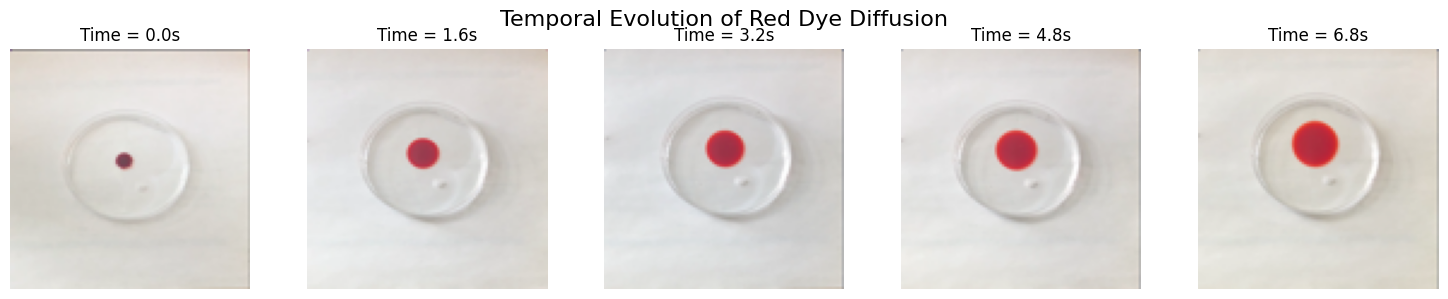

In [51]:
# Parameters
folder_path = "red-dye"
num_images = 18
image_shape = (100, 100)  # Resize all images to the same shape
time_step = 0.4  # seconds between images

# Load and preprocess images (keep in RGB)
u_color = []
for i in range(num_images):
    img_path = os.path.join(folder_path, f"dye{i+1}.png")
    img = Image.open(img_path).resize(image_shape)
    u_color.append(np.array(img))  # No grayscale conversion, no normalization

# Plot temporal evolution
timesteps = [0, 4, 8, 12, 17]

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, t in enumerate(timesteps):
    ax = axes[i]
    ax.imshow(u_color[t])
    ax.set_title(f'Time = {t * time_step:.1f}s')
    ax.axis('off')

plt.suptitle("Temporal Evolution of Red Dye Diffusion", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

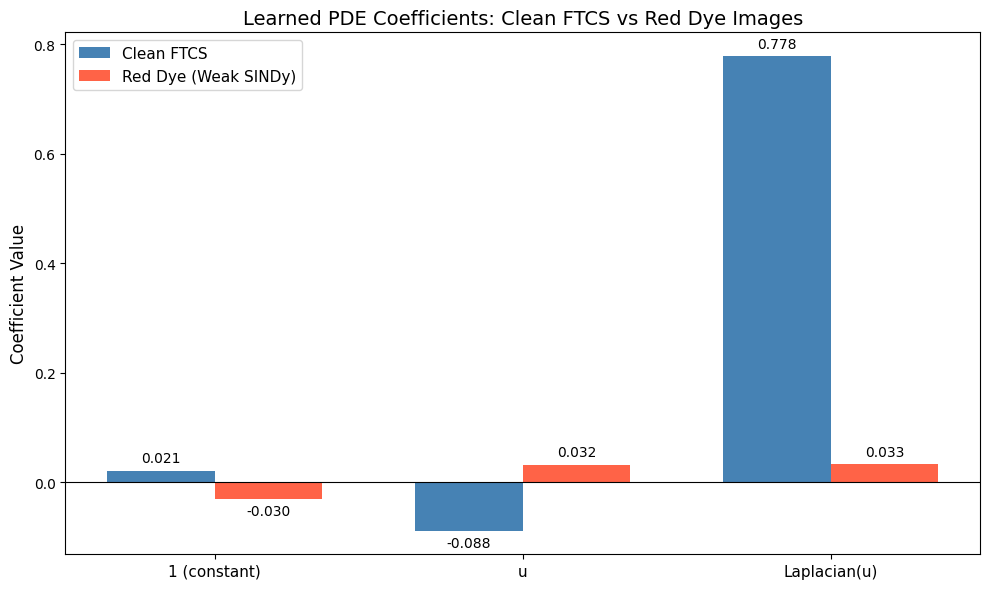

In [50]:
# Terms (same order for both models)
terms = ['1 (constant)', 'u', 'Laplacian(u)']

# Coefficients from Clean FTCS SINDy model
coefficients_clean = [0.021, -0.088, 0.778]

# Weak SINDy coefficients from the dye images
coefficients_dye = [-0.030, 0.032, 0.033]

x = np.arange(len(terms))  # positions for bars
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, coefficients_clean, width, label='Clean FTCS', color='steelblue')
bars2 = ax.bar(x + width/2, coefficients_dye, width, label='Red Dye (Weak SINDy)', color='tomato')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01*np.sign(yval), f'{yval:.3f}',
                ha='center', va='bottom' if yval > 0 else 'top', fontsize=10)

# Formatting
ax.set_ylabel("Coefficient Value", fontsize=12)
ax.set_title("Learned PDE Coefficients: Clean FTCS vs Red Dye Images", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(terms, fontsize=11)
ax.axhline(0, color='black', linewidth=0.8)
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()